# 第5回 課題１ 解説

# SIR model
感染症の流行過程を記述するモデル  
$S$: 感受性保持者（susceptible）  
$I$: 感染性保持者（Infectious）  
$R$: 回復者（Recovered） or 隔離者（Removed）  
$$
\begin{cases}
\frac{dS(t)}{dt} = -\beta S(t) I(t)\\
\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$
  
$R_0$: 基本再生産数
$$
R_0=\frac{\beta S(0)}{\gamma}
$$
  
$z=\frac{R(\infty)}{S(\infty)+I(\infty)+R(\infty)}$: 最終規模（final size）  
  
最終規模方程式（final size equation）  
$R_0$と最終規模の関係
$$
1-z=\exp(-zR_0)
$$
  
$$
R_0=-\frac{\ln(1-z)}{z}
$$

In [38]:
%matplotlib inline

In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [50]:
def sir(betaf,gammaf,x0f,y0f,z0f):
    dt = 0.0001
    t= 0
    x = x0f
    y = y0f
    z = z0f
    xList = [x]
    yList = [y]
    zList = [z]
    tList = [t]
    for i in range(500000):
        t = dt*(i+1)
        xx = x + dt*(-betaf*x*y)
        yy = y + dt*(betaf*x*y-gammaf*y)
        zz = z + dt*(gammaf*y)
        x = xx
        y=yy
        z=zz
        tList.append(t)
        xList.append(x)
        yList.append(y)
        zList.append(z)
        
    out = np.array([tList,xList,yList,zList])
    return out

基本再生産数は 2.0 です


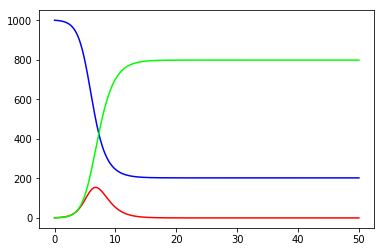

In [59]:
beta = 0.002
gamma = 1
x0 = 1000
y0 = 1
z0 = 0
r0 = beta*x0/gamma
print("基本再生産数は",r0,"です")

sir_out=sir(beta,gamma,x0,y0,z0)
plt.plot(sir_out[0],sir_out[1], color="#0000ff")
plt.plot(sir_out[0],sir_out[2], color="#ff0000")
plt.plot(sir_out[0],sir_out[3], color="#00ff00")

基本再生産数は 0.5 です
betaを小さくすることは、感染率を下げることに相当する
現実に置き換えて考えると、感染者と感受性者の接触を少なくするなどが考えられる


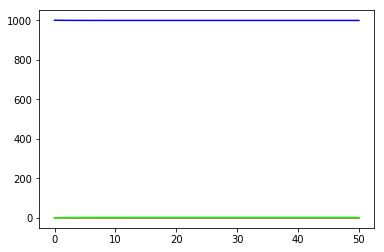

In [61]:
# 05-01解答例１
beta = 0.0005 #betaを小さくする
gamma = 1
x0 = 1000
y0 = 1
z0 = 0
r0 = beta*x0/gamma
print("基本再生産数は",r0,"です")

print("betaを小さくすることは、感染率を下げることに相当する")
print("現実に置き換えて考えると、感染者と感受性者の接触を少なくするなどが考えられる")

sir_out=sir(beta,gamma,x0,y0,z0)
plt.plot(sir_out[0],sir_out[1], color="#0000ff")
plt.plot(sir_out[0],sir_out[2], color="#ff0000")
plt.plot(sir_out[0],sir_out[3], color="#00ff00")

基本再生産数は 0.6666666666666666 です


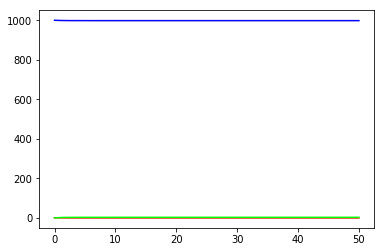

In [63]:
# 05-01解答例2
beta = 0.002
gamma = 3 #gammaを大きくする
x0 = 1000
y0 = 1
z0 = 0
r0 = beta*x0/gamma
print("基本再生産数は",r0,"です")

print("gammaを大きくすることは、回復率または隔離率を上げることに相当する")
print("現実に置き換えて考えると、感染者への効果的な治療を行ったり、感染者を早急に隔離するなどが考えられる")

sir_out=sir(beta,gamma,x0,y0,z0)
plt.plot(sir_out[0],sir_out[1], color="#0000ff")
plt.plot(sir_out[0],sir_out[2], color="#ff0000")
plt.plot(sir_out[0],sir_out[3], color="#00ff00")

基本再生産数は 0.6 です
S(0)を小さくすることは、感受性保持者を少なくすることに相当する
現実に置き換えて考えると、ワクチン接種などで感染を防ぐことが考えられる


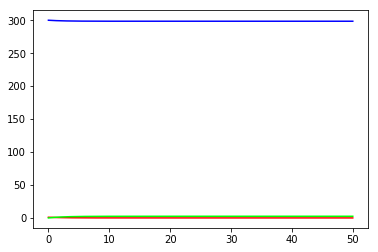

In [65]:
# 05-01解答例3
beta = 0.002
gamma = 1
x0 = 300 #S(0)を小さくする
y0 = 1
z0 = 0
r0 = beta*x0/gamma
print("基本再生産数は",r0,"です")

print("S(0)を小さくすることは、感受性保持者を少なくすることに相当する")
print("現実に置き換えて考えると、ワクチン接種などで感染を防ぐことが考えられる")

sir_out=sir(beta,gamma,x0,y0,z0)
plt.plot(sir_out[0],sir_out[1], color="#0000ff")
plt.plot(sir_out[0],sir_out[2], color="#ff0000")
plt.plot(sir_out[0],sir_out[3], color="#00ff00")

In [10]:
# 最終規模から基本再生産数の計算
fs = zList[-1]/(xList[-1]+yList[-1]+zList[-1]) #最終規模
r0fs = -math.log(1-fs)/fs
print("最終規模から計算される基本再生産数は",r0fs,"です")

最終規模から計算される基本再生産数は 2.003273470627831 です
